In [ ]:
!git clone https://github.with/ricagodoy/BioSignalAndImgProcessing.git

Cloning into 'BioSignalAndImgProcessing'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 17 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (17/17), 211.58 KiB | 1.21 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [ ]:
cd BioSignalAndImgProcessing

/content/BioSignalAndImgProcessing


the signal of EMG below represents two cycles respiratory of one dog acquired using electrodes positioned close to the diaphragm of the animal.the sampling rate is 10 kHz.the first plot shows the EMG, the according to its envelope (activity), and the third shows the flow of air.

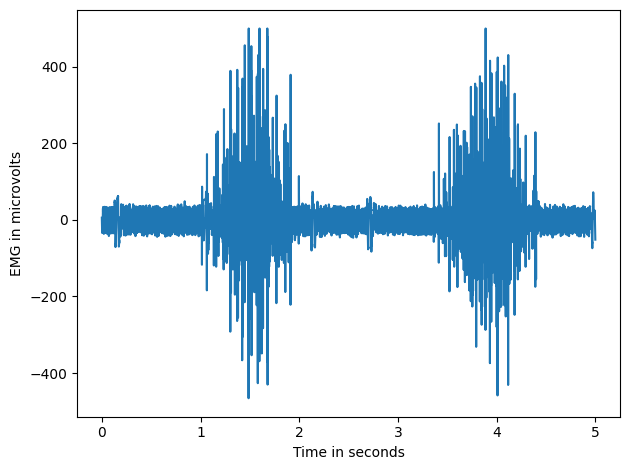

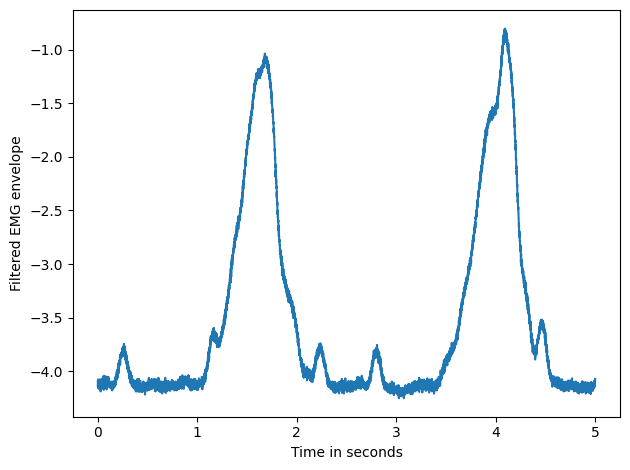

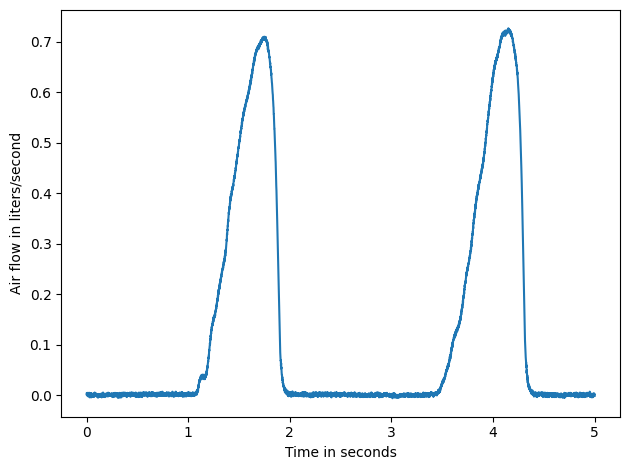

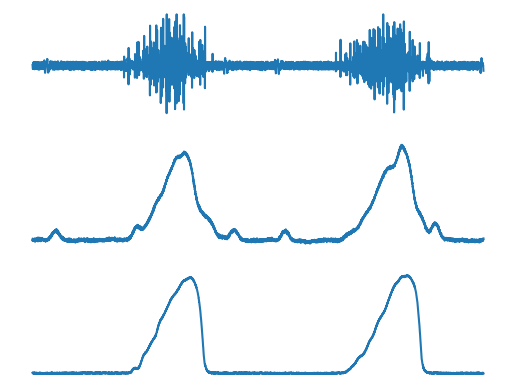

In [ ]:
import numpy as np import matplotlib.pyplot as plt  # loads the data EMG emg = np.loadtxt('emg_dog2.dat') fs1 = 10000 # taxa of amostragem to EMG emg = emg * 1000 / 20 # ganho = 20,000; now in microvolts  slen1 = len(emg) t1 = np.arange(1, slen1 + 1) / fs1 # axis of the time the 10.000 Hz  plt.figure() plt.plot(t1, emg) plt.xlabel('Time in seconds') plt.ylabel('EMG in microvolts') plt.tight_layout()  # loads the envelope of the EMG env = np.loadtxt('emg_dog2_env.dat') fs2 = 1000 # taxa of amostragem to the envelope e canal of fluxo of ar slen2 = len(env) t2 = np.arange(1, slen2 + 1) / fs2 # axis of the time the 1.000 Hz  plt.figure() plt.plot(t2, env) plt.xlabel('Time in seconds') plt.ylabel('Filtered EMG envelope') plt.tight_layout()  # loads the fluxo of ar (in litros/according to) flow = np.loadtxt('emg_dog2_flo.dat')  plt.figure() plt.plot(t2, flow) plt.xlabel('Time in seconds') plt.ylabel('Air flow in liters/second') plt.tight_layout()  # Plot with three subplots without axes plt.figure() plt.subplot(3, 1, 1) plt.plot(t1, emg) plt.axis('off')  plt.subplot(3, 1, 2) plt.plot(t2, env) plt.axis('off')  plt.subplot(3, 1, 3) plt.plot(t2, flow) plt.axis('off')  plt.show() 

* **Loading and sampling rate:** the signal EMG is loaded with np.loadtxt and the sampling rate is defined the 10 kHz.* **definition of the windows:** are defined two sizes of window (50 ms and 150 ms) convertidos to number of samples.* **calculation of the RMS:** the function moving_rms uses the technique of convolution to calculate the average mobile of the square of the signal and, in seguida, the root square to get the RMS in each instant.* **Visualização:** the code generates a graph where the signal original is plotted juntamente with the curved of RMS obtidas with the two sizes of window, facilitando the comparison.

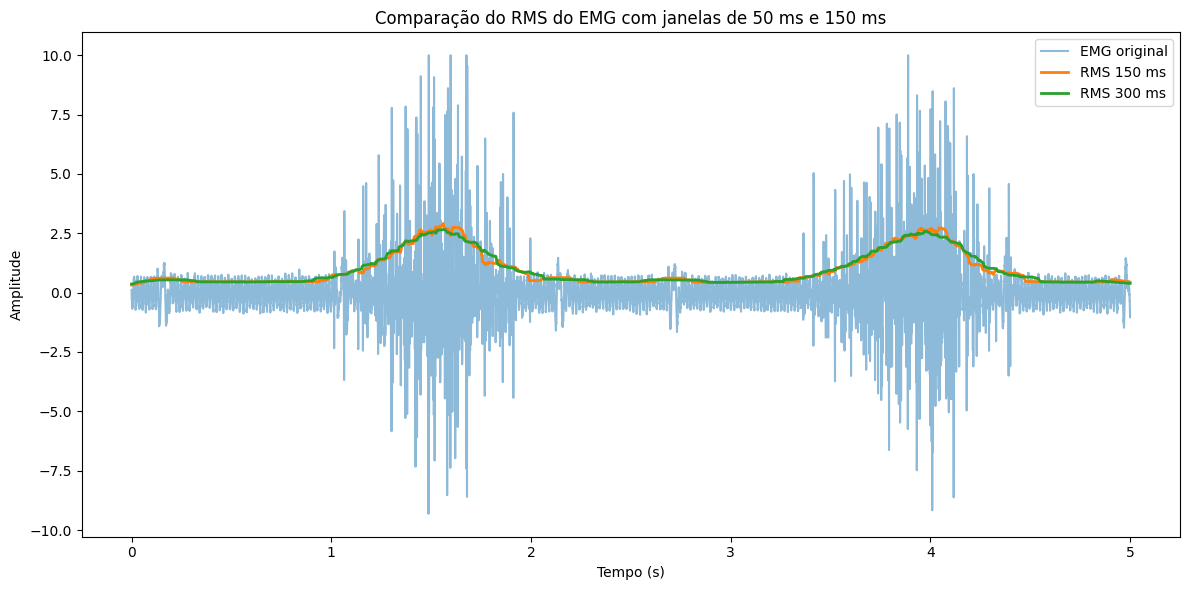

In [ ]:
import numpy as np import matplotlib.pyplot as plt  # loads the signal EMG (certifique-if of that the file esteja in the same diretório) emg = np.loadtxt('emg_dog2.dat') fs = 10000 # taxa of amostragem in Hz (10 kHz)  # definition of the comprimentos of the janelas in milissegundos win1_ms = 50 # janela of 50 ms win2_ms = 150 # janela of 150 ms win3_ms = 300 # janela of 300 ms  # Conversão of the comprimentos of janela of ms to number of samples win1_samples = int(win1_ms / 1000 * fs) # 50 ms correspondem the 500 samples win2_samples = int(win2_ms / 1000 * fs) # 150 ms correspondem the 1500 samples win3_samples = int(win3_ms / 1000 * fs)  # function to calculate the RMS using average mobile (convolução) def moving_rms(signal, window_samples):  # # creates one vector with coeficientes uniformes to the average  window = np.ones(window_samples) / window_samples  # # calculates the average mobile of the square of the signal e tira the raiz square  rms_squared = np.convolve(signal**2, window, mode='same')  return np.sqrt(rms_squared)  # calculates the RMS to cada janela rms50 = moving_rms(emg, win1_samples) rms150 = moving_rms(emg, win2_samples) rms300 = moving_rms(emg, win3_samples)  # defines the axis of the time t = np.arange(len(emg)) / fs  # plots the signal original e the values RMS calculados with the two janelas plt.figure(figsize=(12, 6)) plt.plot(t, emg, label='EMG original', alpha=0.5) # plt.plot(t, rms50, label=f'RMS {win1_ms} ms', linewidth=2) plt.plot(t, rms150, label=f'RMS {win2_ms} ms', linewidth=2) plt.plot(t, rms300, label=f'RMS {win3_ms} ms', linewidth=2) plt.xlabel('Tempo (s)') plt.ylabel('Amplitude') plt.title('Comparação of RMS of EMG with janelas de 50 ms e 150 ms') plt.legend() plt.tight_layout() plt.show() 

* **Loading and Pré-processamento:**are loaded the signals of EMG, envelope and flow. the signal EMG is convertido to microvolts (according to the ganho applied).* **calculation of the RMS:**the function moving_rms uses convolution to calculate the RMS in the window mobile. are usadas windows of 50 ms and 150 ms. to facilitar the comparison with signals amostrados the 1 kHz (envelope and flow), the results of the RMS are decimados (the each 10 samples).* **calculation of the Turns Count:**the function count_turns identifica the extremos locais and conta one “turn” always that the difference between extremos consecutivos is larger or equal to the threshold defined. the function moving_turns applies this calculation in the window mobile. are testadas windows of 50 ms and 150 ms and thresholds variando from 0 to 200 µV.* **comparison with the flow respiratory:**one set of graphs is generated to compare the curved of the envelope, of the RMS and of the turns count (using, by example, threshold of 100 µV and window of 50 ms) with the signal of flow respiratory.**Considerações*** choice of the parameters:the study of the results to different thresholds allows evaluate which value torna the curved of the turns count more sensível or robusta to refletir variations of the flow respiratory.* Decimação:the EMG is amostrado the 10 kHz and the signals of envelope and flow the 1 kHz, the results of the RMS and of the turns count were decimados to facilitar the sobreposição and the comparison.* Usabilidade to represent the flow respiratory:the comparison visual of the graphs ajuda the determinar which of the measures (envelope, RMS or turns count) acompanha of shape more clear the variations of the flow respiratory.

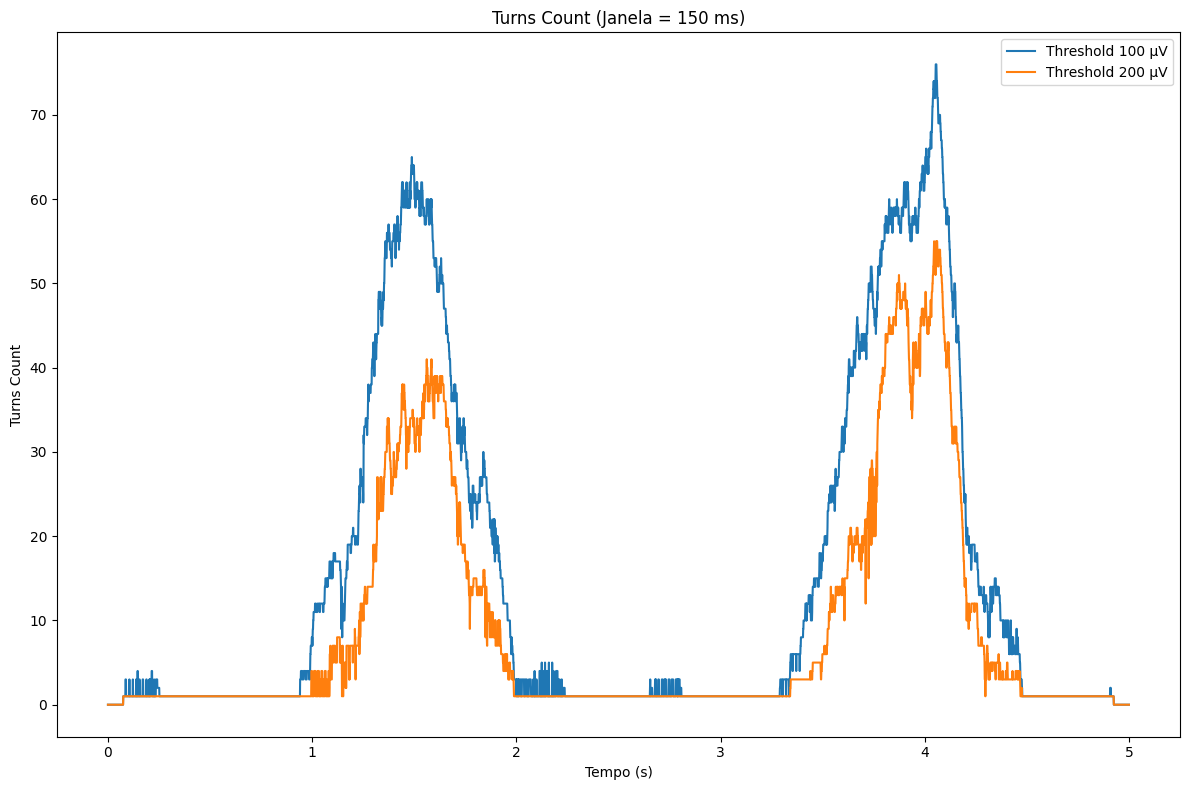

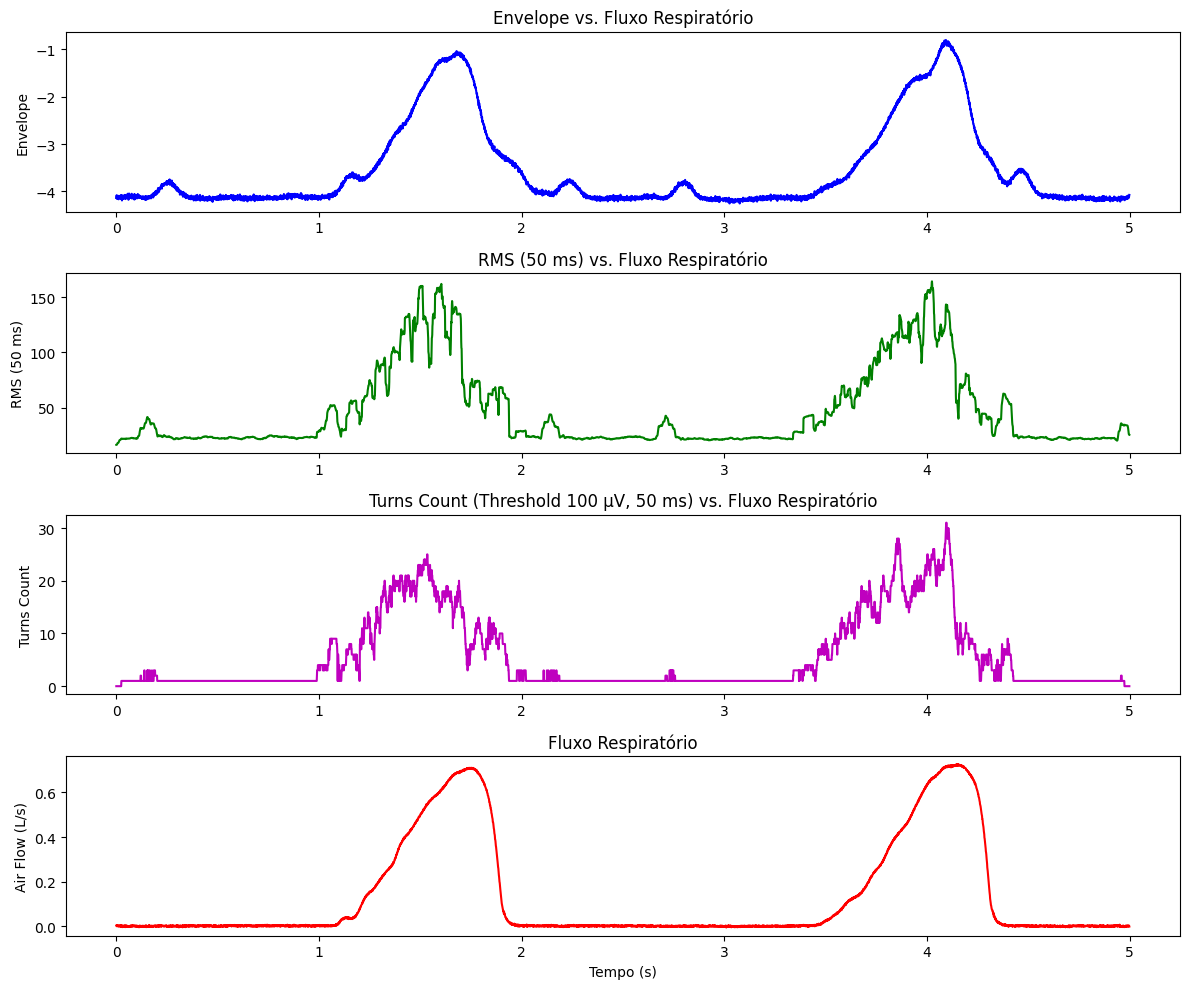

In [ ]:
import numpy as np import matplotlib.pyplot as plt  # ============================ # Carregamento of the data # ============================ # signal EMG (taxa of amostragem: 10 kHz) emg = np.loadtxt('emg_dog2.dat') fs_emg = 10000 # Hz t_emg = np.arange(len(emg)) / fs_emg  # Envelope EMG (already filtrado, taxa of amostragem: 1 kHz) env = np.loadtxt('emg_dog2_env.dat') fs_env = 1000 # Hz t_env = np.arange(len(env)) / fs_env  # Fluxo respiratório (in litros/according to, taxa of amostragem: 1 kHz) flow = np.loadtxt('emg_dog2_flo.dat') t_flow = np.arange(len(flow)) / fs_env  # ============================ # Pré-processamento of the signal EMG # ============================ # Conversão of the signal (if necessary, according to the ganho applied in the MATLAB original) # here, the conversão era: emg = emg*1000/20 (devido ao ganho of 20.000) emg = emg * 1000 / 20  # ============================ # Cálculo of the RMS with janelas mobile # ============================ def moving_rms(signal, window_samples):  """Calcula o RMS of sinal usando uma janela móvel via convolução."""  window = np.ones(window_samples) / window_samples  rms_sq = np.convolve(signal**2, window, mode='same')  return np.sqrt(rms_sq)  # defining two janelas: 50 ms e 150 ms win50 = int(0.05 * fs_emg) # 50 ms → 500 samples win150 = int(0.15 * fs_emg) # 150 ms → 1500 samples  # calculates RMS to the two janelas rms50 = moving_rms(emg, win50) rms150 = moving_rms(emg, win150)  # to facilitar the comparison with the signals of 1 kHz, decima the results (10x) rms50_ds = rms50[::10] rms150_ds = rms150[::10] t_rms = t_emg[::10]  # ============================ # Cálculo of the Turns Count # ============================ def count_turns(segment, threshold):  """  Conta os 'turns' (viradas) in segmento.  Um ponto é considerado um 'turn' if for um extremo local (máximo or mínimo)  e if a variação in relação ao extremo anterior for maior or igual ao threshold.  """  turns = 0  last_extreme = None  # # Percorre the points of the segmento (exceto the edges)  for i in range(1, len(segment)-1):  # # Verifica if é extremo local  if (segment[i] - segment[i-1]) * (segment[i] - segment[i+1]) > 0:  if last_extreme is None:  last_extreme = segment[i]  turns += 1  else:  if abs(segment[i] - last_extreme) >= threshold:  turns += 1  last_extreme = segment[i]  return turns  def moving_turns(signal, window_samples, threshold):  """  Calcula o turns count in uma janela móvel.  to cada posição central of janela, conta os turns in segmento.  """  n = len(signal)  half_win = window_samples // 2  turns_array = np.zeros(n)  # # calculates apenas to the posições where the janela is completely definida  for i in range(half_win, n - half_win):  segment = signal[i - half_win : i + half_win]  turns_array[i] = count_turns(segment, threshold)  return turns_array  # Escolhendo two janelas to the cálculo (50 ms e 150 ms) window_lengths = {'150 ms': win150}  # list of thresholds the test (in microvolts) thresholds = [100, 200]  # to cada size of janela, calculate e plot the curved of turns count to cada threshold for label, win_samples in window_lengths.items():  plt.figure(figsize=(12, 8))  for thr in thresholds:  turns_curve = moving_turns(emg, win_samples, thr)  # # to compare with the signals of 1 kHz, decima the curved (10x)  turns_curve_ds = turns_curve[::10]  plt.plot(t_rms, turns_curve_ds, label=f'Threshold {thr} µV')  plt.xlabel('Tempo (s)')  plt.ylabel('Turns Count')  plt.title(f'Turns Count (Janela = {label})')  plt.legend()  plt.tight_layout()  plt.show()  # ============================ # comparison: Envelope, RMS e Turns Count vs. Fluxo Respiratório # ============================ # to the comparison, escolhemos: # - Envelope: already loaded # - RMS: using janela of 50 ms (decimado to 1 kHz) # - Turns count: using janela of 50 ms e one threshold selecionado (by example, 100 µV) selected_threshold = 100 selected_window = win50 # 50 ms  # calculates turns count with the parameters selecionados e decima to 1 kHz turns_selected = moving_turns(emg, selected_window, selected_threshold) turns_selected_ds = turns_selected[::10]  # Plot of comparison plt.figure(figsize=(12, 10))  plt.subplot(4, 1, 1) plt.plot(t_env, env, 'b') plt.ylabel('Envelope') plt.title('Envelope vs. Fluxo Respiratório')  plt.subplot(4, 1, 2) plt.plot(t_rms, rms50_ds, 'g') plt.ylabel('RMS (50 ms)') plt.title('RMS (50 ms) vs. Fluxo Respiratório')  plt.subplot(4, 1, 3) plt.plot(t_rms, turns_selected_ds, 'm') plt.ylabel('Turns Count') plt.title('Turns Count (Threshold 100 µV, 50 ms) vs. Fluxo Respiratório')  plt.subplot(4, 1, 4) plt.plot(t_flow, flow, 'r') plt.ylabel('Air Flow (L/s)') plt.xlabel('Tempo (s)') plt.title('Fluxo Respiratório') plt.tight_layout() plt.show() 

in the code below we have an example of signal of voz of the palavra 'safety' coletado the 8 kHz. the signal has noise of fundo. the code below calculates the RMS, zero crossing rate, and turns count to windows of 10 the 100 ms.

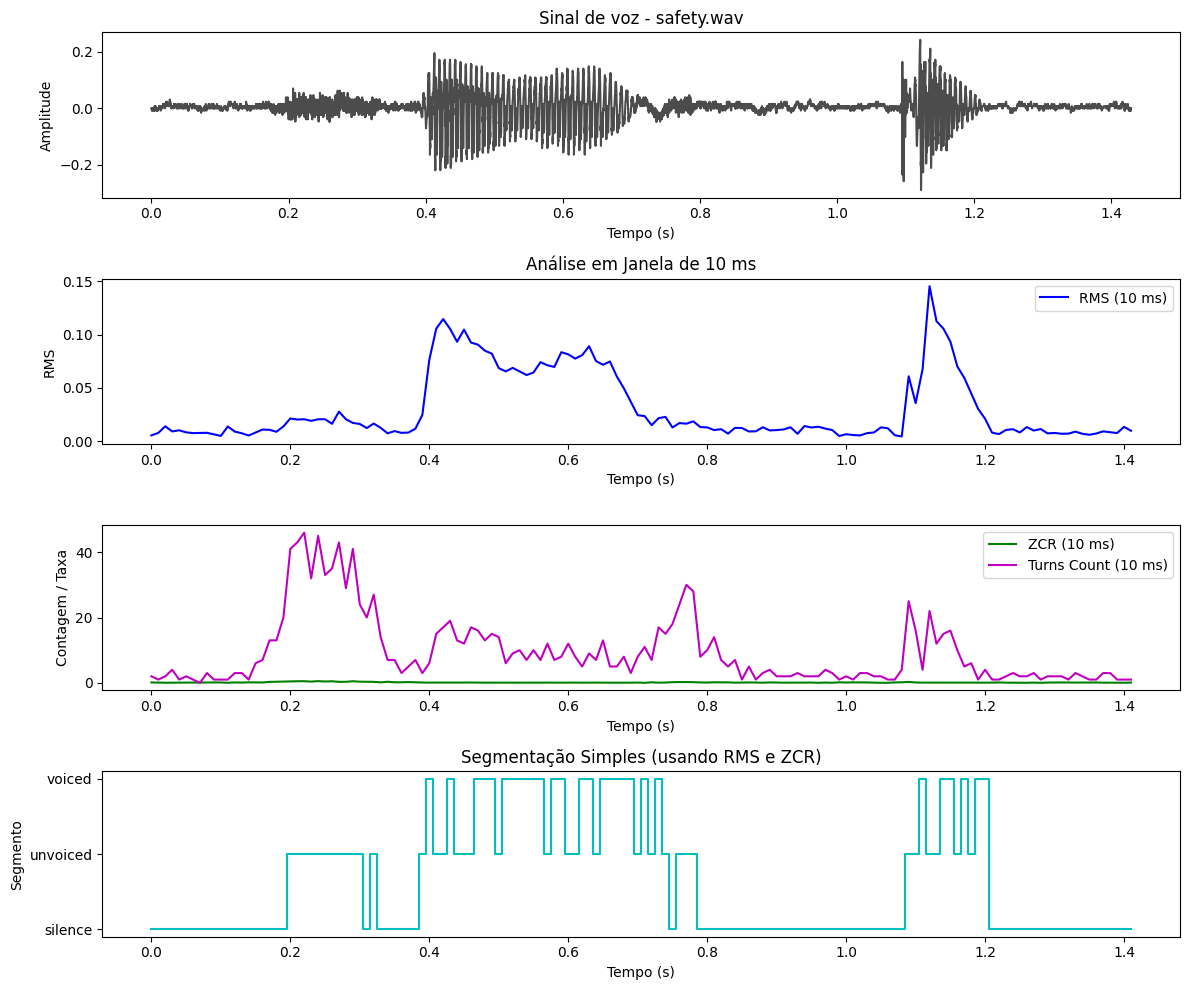

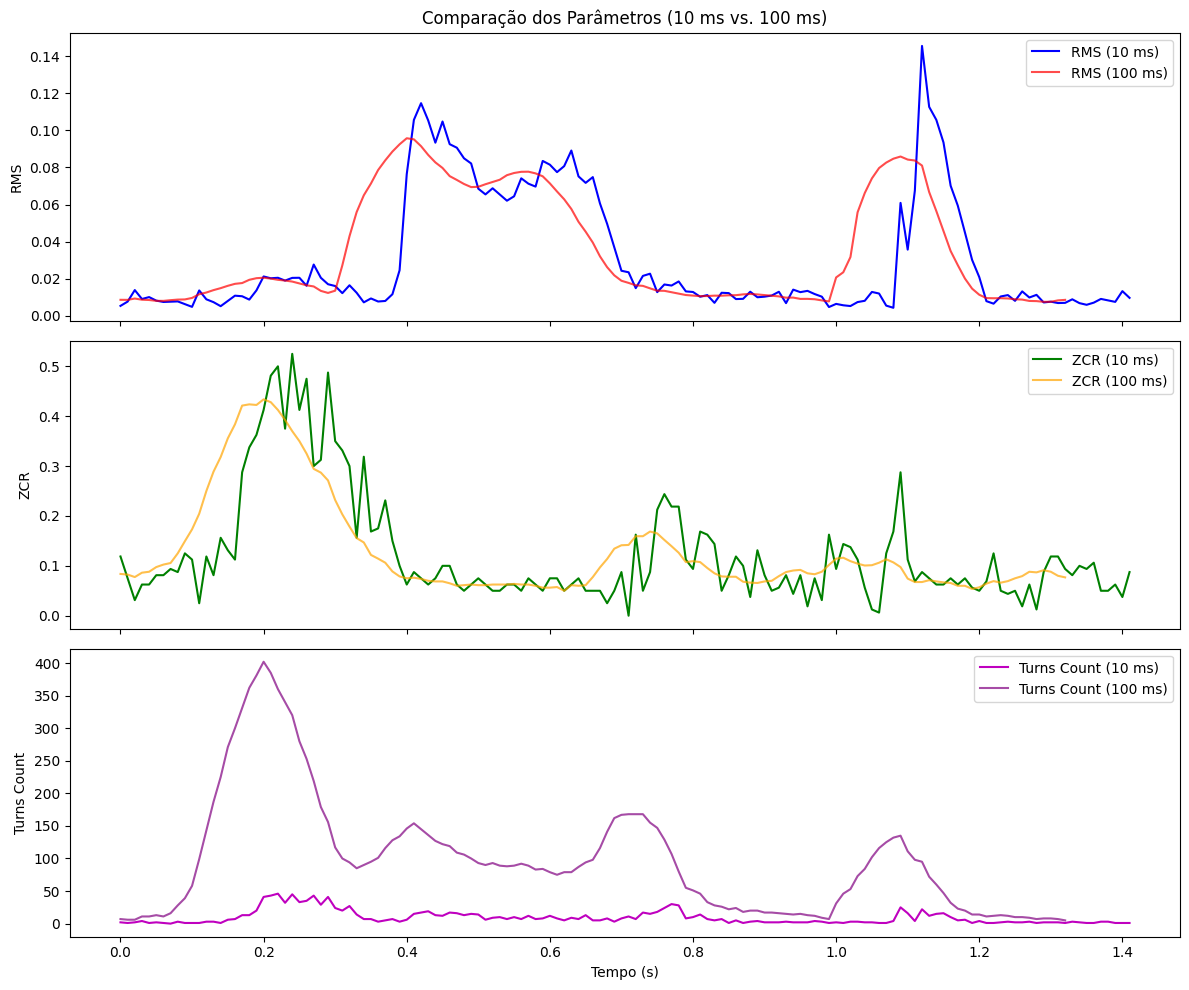

In [ ]:
import numpy as np import matplotlib.pyplot as plt import librosa  # ============================================================================= # functions of analysis in janela mobile # ============================================================================= def moving_rms(signal, window_size, hop):  """Calcula o RMS in janelas móveis."""  rms_vals = []  for i in range(0, len(signal) - window_size + 1, hop):  window = signal[i:i+window_size]  rms_vals.append(np.sqrt(np.mean(window**2)))  return np.array(rms_vals)  def moving_zcr(signal, window_size, hop):  """Calcula a taxa de cruzamento by zero (ZCR) in janelas móveis."""  zcr_vals = []  for i in range(0, len(signal) - window_size + 1, hop):  window = signal[i:i+window_size]  # # Contagem of cruzamentos of zero  zc = np.sum(np.abs(np.diff(np.sign(window)))) / 2  # # Normaliza by the size of the janela  zcr_vals.append(zc / window_size)  return np.array(zcr_vals)  def count_turns(window, thr):  """  Conta os "turns" (viradas) in uma janela.  Um ponto é considerado um turno if for um extremo local e a variação in relação  ao extremo anterior for maior or igual ao threshold 'thr'.  """  count = 0  last_extreme = None  for j in range(1, len(window)-1):  # # Verifica if the point é extremo local  if (window[j]-window[j-1]) * (window[j]-window[j+1]) > 0:  if last_extreme is None:  last_extreme = window[j]  count += 1  else:  if abs(window[j] - last_extreme) >= thr:  count += 1  last_extreme = window[j]  return count  def moving_turns(signal, window_size, hop, thr):  """Calcula o turns count in janelas móveis, usando o threshold 'thr'."""  turns_vals = []  for i in range(0, len(signal) - window_size + 1, hop):  window = signal[i:i+window_size]  turns_vals.append(count_turns(window, thr))  return np.array(turns_vals)  # ============================================================================= # Carregamento of the signal of voz # ============================================================================= # safety.wav contém the palavra "safety" with background noise # Taxa of amostragem definida to 8 kHz signal, sr = librosa.load('safety.wav', sr=8000) t_signal = np.arange(len(signal)) / sr  # ============================================================================= # parameters of janelas e avanço (hop) # ============================================================================= # Janelas of 10 ms e 100 ms (in samples) win_10ms = int(0.010 * sr) # ~80 samples win_100ms = int(0.100 * sr) # ~800 samples  # defining the hop: We will use avanço of 10 ms to have resolução temporal equal hop = int(0.010 * sr) # 10 ms  # ============================================================================= # Cálculo of the parameters to the two durações of janela # ============================================================================= # --- Janela of 10 ms --- rms_10 = moving_rms(signal, win_10ms, hop) zcr_10 = moving_zcr(signal, win_10ms, hop) # to turns count, é necessary defines one threshold to considerar the variação relevante. # the value of the threshold can be ajustado; here we use 5% of the value maximum absolute of the signal (example) thr_turns = 0.05 * np.max(np.abs(signal)) turns_10 = moving_turns(signal, win_10ms, hop, thr_turns)  frames_10 = len(rms_10) t_frames_10 = np.arange(frames_10) * hop / sr  # --- Janela of 100 ms --- rms_100 = moving_rms(signal, win_100ms, hop) zcr_100 = moving_zcr(signal, win_100ms, hop) turns_100 = moving_turns(signal, win_100ms, hop, thr_turns)  frames_100 = len(rms_100) t_frames_100 = np.arange(frames_100) * hop / sr  # ============================================================================= # Segmentação simple: voiced, unvoiced e silence # ============================================================================= # We will use the parameters extraídos with the janela of 10 ms to the classificação. # the regra simple: # - silence: RMS abaixo of one certo limiar (ex: 10% of the RMS maximum) # - between the quadros não-silenciosos, consideramos: # voiced -> low taxa of cruzamento (ZCR abaixo of the mediano) # unvoiced -> ZCR acima of the mediano silence_thresh = 0.10 * np.max(rms_10) non_silence_idx = rms_10 >= silence_thresh if np.sum(non_silence_idx) > 0:  zcr_median = np.median(zcr_10[non_silence_idx]) else:  zcr_median = np.median(zcr_10)  labels = [] for r, z in zip(rms_10, zcr_10):  if r < silence_thresh:  labels.append("silence")  else:  labels.append("voiced" if z < zcr_median else "unvoiced") labels = np.array(labels)  # ============================================================================= # Plot of the results # ============================================================================= plt.figure(figsize=(12, 10))  # Plot of the signal of áudio plt.subplot(4, 1, 1) plt.plot(t_signal, signal, color='k', alpha=0.7) plt.xlabel("Tempo (s)") plt.ylabel("Amplitude") plt.title("Sinal de voz - safety.wav")  # Plot of the parameters (janela of 10 ms) plt.subplot(4, 1, 2) plt.plot(t_frames_10, rms_10, label="RMS (10 ms)", color='b') plt.xlabel("Tempo (s)") plt.ylabel("RMS") plt.legend() plt.title("Análise in Janela de 10 ms")  plt.subplot(4, 1, 3) plt.plot(t_frames_10, zcr_10, label="ZCR (10 ms)", color='g') plt.plot(t_frames_10, turns_10, label="Turns Count (10 ms)", color='m') plt.xlabel("Tempo (s)") plt.ylabel("Contagem / Taxa") plt.legend()  # Plot of the segmentação (classificação simple) plt.subplot(4, 1, 4) # for visualization, we convert the labels to numbers (silence=0, unvoiced=1, voiced=2) label_to_num = {"silence": 0, "unvoiced": 1, "voiced": 2} num_labels = np.array([label_to_num[l] for l in labels]) plt.step(t_frames_10, num_labels, where='mid', color='c') plt.yticks([0, 1, 2], ['silence', 'unvoiced', 'voiced']) plt.xlabel("Tempo (s)") plt.ylabel("Segmento") plt.title("Segmentação Simples (usando RMS e ZCR)")  plt.tight_layout() plt.show()  # ============================================================================= # Plot comparativo: Janela of 10 ms vs. Janela of 100 ms to the parameters # ============================================================================= fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)  # RMS comparativo axs[0].plot(t_frames_10, rms_10, label="RMS (10 ms)", color='b') axs[0].plot(t_frames_100, rms_100, label="RMS (100 ms)", color='r', alpha=0.7) axs[0].set_ylabel("RMS") axs[0].legend() axs[0].set_title("Comparação of Parâmetros (10 ms vs. 100 ms)")  # ZCR comparativo axs[1].plot(t_frames_10, zcr_10, label="ZCR (10 ms)", color='g') axs[1].plot(t_frames_100, zcr_100, label="ZCR (100 ms)", color='orange', alpha=0.7) axs[1].set_ylabel("ZCR") axs[1].legend()  # Turns count comparativo axs[2].plot(t_frames_10, turns_10, label="Turns Count (10 ms)", color='m') axs[2].plot(t_frames_100, turns_100, label="Turns Count (100 ms)", color='purple', alpha=0.7) axs[2].set_ylabel("Turns Count") axs[2].set_xlabel("Tempo (s)") axs[2].legend()  plt.tight_layout() plt.show()  # ============================================================================= # comments about the results: # ============================================================================= # Ao execute este code, you poderá observar that: # - the RMS tende the be mais high in the regiões where há voz (especially voiced) e low # during the silêncio. # - the taxa of zero crossing (ZCR) generally é smaller in regiões voiced (voz bem periódica) # e mais high in regiões unvoiced or in the background noise. # - the turns count also varia with the natureza of the signal: regiões with oscilações # mais acentuadas (typically unvoiced or with noise) can apresentar larger contagem. # # thus, comparando the three parameters, é possível check that the envelope RMS can be mais # robusto to detect regiões voiced versus silence, while the ZCR e the turns count can ajudar # the diferenciar between componentes voiced e unvoiced. the escolha of the size of the janela (10 ms to # larger resolução temporal or 100 ms to suavização) also influencia in the sensibilidade of the # parameters às variações fast of the signal. 